### 1. 라이브러리 불러오기

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 데이터 불러오기

In [151]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2.2 customerID 중복 확인

In [152]:
df['customerID'].value_counts().sum()

7043

#### 2.2 결측치 확인

In [153]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.3 사용할 컬럼 추출

In [154]:
df_fin = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents' ,'tenure', 
    'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df_fin.shape

(7043, 10)

In [155]:
df_fin['TotalCharges'].isnull().sum()

0

#### 2.4 데이터 타입 확인

In [156]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   object 
 9   Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


#### 2.5 TotalCharges 컬럼을 float 타입으로 변환 및 NaN 값을 0으로 변환

In [157]:
df_fin['TotalCharges'] = df_fin['TotalCharges'].replace('', '0')

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/4130414763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['TotalCharges'] = df_fin['TotalCharges'].replace('', '0')


In [158]:
df_fin[df_fin['TotalCharges'] == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn


In [159]:
df_fin['TotalCharges'] = df_fin['TotalCharges'].str.strip().replace('', np.nan).astype(float)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/4124478833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['TotalCharges'] = df_fin['TotalCharges'].str.strip().replace('', np.nan).astype(float)


In [160]:
df_fin[df_fin['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,Yes,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,73.35,NaN,No


In [161]:
df_fin['TotalCharges'].fillna(0, inplace=True)

df_fin['TotalCharges'] = df_fin['TotalCharges'].astype('float64')

df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/3138801762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['TotalCharges'].fillna(0, inplace=True)
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/3138801762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['TotalCharges'] = df_fin['TotalCharges'].astype('float64')


#### 2.6 boolean 타입 컬럼을 int 타입으로 변환

In [162]:
df_fin["gender_encode"] = (df_fin["gender"] == "Male").astype(int)
df_fin["Partner_encode"] = (df_fin["Partner"] == "Yes").astype(int)
df_fin["Dependents_encode"] = (df_fin["Dependents"] == "Yes").astype(int)
df_fin["PhoneService_encode"] = (df_fin["PhoneService"] == "Yes").astype(int)
df_fin["PaperlessBilling_encode"] = (df_fin["PaperlessBilling"] == "Yes").astype(int)
df_fin

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/1835695691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin["gender_encode"] = (df_fin["gender"] == "Male").astype(int)
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/1835695691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin["Partner_encode"] = (df_fin["Partner"] == "Yes").astype(int)
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86342/1835695691.py:3: SettingWithCopyWarning: 
A value is try

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,0,1,0,0,1
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,1,0,0,1,0
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,1,0,0,1,1
3,Male,0,No,No,45,No,No,42.30,1840.75,No,1,0,0,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,1,1,1,1,1
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,0,1,1,1,1
7040,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,0,1,1,0,1
7041,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,1,1,0,1,1


# 📌 미션 1) 학습, 예측 데이터셋을 나눠주세요.

- X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
  - 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
- X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
  - 예측에 사용할 데이터셋 예) 실전 시험문제
- y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
  - 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
- y_test : label_name 에 해당 되는 컬럼만 test에서 가져옵니다.
  - 예측에 사용할 정답 값 예) 실전 문제의 정답
- 아래의 형태로 데이터셋을 나누되, train 데이터셋의 shape 는 (5625, 9), test 데이터셋의 shape 는 (1407, 9) 이 되도록 합니다. 행의 customerID 는 섞여도 상관 없으며 아래와 순서가 달라도 되며, train, test의 shape 값의 행의 수가 8:2 로 나뉘면 됩니다.
  - X_train, X_test 의 shape 출력 예시 입니다. (5625, 9), (1407, 9)

In [163]:
df_fin

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,0,1,0,0,1
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,1,0,0,1,0
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,1,0,0,1,1
3,Male,0,No,No,45,No,No,42.30,1840.75,No,1,0,0,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,1,1,1,1,1
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,0,1,1,1,1
7040,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,0,1,1,0,1
7041,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,1,1,0,1,1


### 1. features, label 분류

In [164]:
feature_names = df_fin[['gender_encode','SeniorCitizen',
                        'tenure', 'Partner_encode', 
                        'Dependents_encode', 'PhoneService_encode',
                        'PaperlessBilling_encode', 'MonthlyCharges',
                        'TotalCharges']].columns.to_list()
feature_names

['gender_encode',
 'SeniorCitizen',
 'tenure',
 'Partner_encode',
 'Dependents_encode',
 'PhoneService_encode',
 'PaperlessBilling_encode',
 'MonthlyCharges',
 'TotalCharges']

In [165]:
label_name = df_fin.columns[9]
label_name

'Churn'

### 2. 학습, 예측 데이터셋 분류

In [166]:
from sklearn.model_selection import train_test_split

X = df_fin[feature_names]
y = df_fin[label_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [167]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5634, 9) (1409, 9)
(5634,) (1409,)


# 📌 미션 2) - 머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

- 강의에 있는 DecisionTree 를 사용해도 되며, 사이킷런의 다른 모델을 사용해도 됩니다. 다음과 같이 예측값이 나오도록 예측해 주세요. 이탈여부의 Yes, No 는 예시로 다음의 결과와 달라도 상관 없습니다.
 '''y_predict[:5] 를 출력했을 때 아래처럼 이탈 여부에 대한 값이 나옵니다.
array(['No', 'No', 'No', 'No', 'No'], dtype=object) '''
- 사이킷런에서 좋은 성능을 내고 주목받고 있는 알고리즘을 별도의 라이브러리로 공개되어 있는 것들이 다음과 같습니다.
  - 부스팅계열 알고리즘(주로 정형 데이터) => XGBoost, LightGBM, CatBoost 등
  - 신경망 알고리즘(주로 비정형 데이터) => TensorFlow, Keras, PyTorch 등
- 알고리즘 중에는 분류, 회귀에 따로 사용할 수 있는 것도 있고, 분류, 회귀에 모두 사용할 수 있는 것도 있습니다.
  - 회귀 알고리즘 => 분류(로지스틱 회귀), 회귀(릿지, 라쏘, 엘라스틱넷) 분류에 사용하는 알고리즘과 회귀에 사용하는게 다릅니다.
  - 분류 및 회귀 트리(Classification And Regression Tree, CART) => 분류와 회귀에 모두 사용할 수 있습니다.
- 결정 트리 학습법 - 위키백과, 우리 모두의 백과사전
- 머신러닝 모델의 성능을 개선하는 방법
  - 데이터 분할
  - 데이터 전처리, 결측치 처리
  - 피처 선택, 피처 엔지니어링(스케일링, 변환, 인코딩 등)
  - 모델의 파라미터 값을 변경하는 방법
- 머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

### 1. 모델 학습 및 예측 - max_depth = 5

In [168]:
from sklearn.tree import DecisionTreeClassifier

model_5 = DecisionTreeClassifier(max_depth=5, random_state=64)

model_5

DecisionTreeClassifier(max_depth=5, random_state=64)

In [169]:
model_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=64)

In [170]:
y_pred_5 = model_5.predict(X_test)
y_pred_5.shape

(1409,)

### 2. 모델 학습 및 예측 - max_depth = 8

In [171]:
model_8 = DecisionTreeClassifier(max_depth=8, random_state=64)

model_8.fit(X_train, y_train)

y_pred_8 = model_8.predict(X_test)
y_pred_8

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

### 3. 모델 학습 및 예측 - max_depth = 12

In [172]:
model_12 = DecisionTreeClassifier(max_depth=12, random_state=64)

model_12.fit(X_train, y_train)

y_pred_12 = model_12.predict(X_test)
y_pred_12

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### 4. 모델 학습 및 예측 - max_depth = 15

In [173]:
model_15 = DecisionTreeClassifier(max_depth=15, random_state=64)

model_15.fit(X_train, y_train)

y_pred_15 = model_15.predict(X_test)
y_pred_15

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

### 5. 모델 학습 및 예측 - max_depth = 18

In [174]:
model_18 = DecisionTreeClassifier(max_depth=18, random_state=64)

model_18.fit(X_train, y_train)

y_pred_18 = model_18.predict(X_test)
y_pred_18

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

# 📌 미션 3) - 점수 측정하고 피처의 중요도 시각화 해주세요.

- 예측한 데이터셋의 점수를 Accuracy로 측정하고 모델이 학습한 피처의 중요도를 시각화 해주세요.
- 피처 중요도 이미지는 예시이며 다른 결과가 나와도 상관 없습니다. 또, 트리 계열 모델이 아닌 다른 모델로 학습했을 때도 해당 모델에 맞는 피처 중요도를 시각화 해주세요.

### 1. 트리 시각화 하기

#### 1-1. max_depth = 5

[Text(0.5, 0.9166666666666666, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4141, 1493]'),
 Text(0.25, 0.75, 'MonthlyCharges <= 69.475\ngini = 0.496\nsamples = 2031\nvalue = [1104, 927]'),
 Text(0.125, 0.5833333333333334, 'tenure <= 3.5\ngini = 0.416\nsamples = 1134\nvalue = [799, 335]'),
 Text(0.0625, 0.4166666666666667, 'MonthlyCharges <= 22.325\ngini = 0.494\nsamples = 490\nvalue = [272, 218]'),
 Text(0.03125, 0.25, 'TotalCharges <= 33.4\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.454\nsamples = 138\nvalue = [90, 48]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.175\nsamples = 62\nvalue = [56, 6]'),
 Text(0.09375, 0.25, 'SeniorCitizen <= 0.5\ngini = 0.491\nsamples = 290\nvalue = [126, 164]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.498\nsamples = 252\nvalue = [118, 134]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.332\nsamples = 38\nvalue = [8, 30]'),
 Text(0.1875, 0.4166666666666667, 'MonthlyCharges <= 

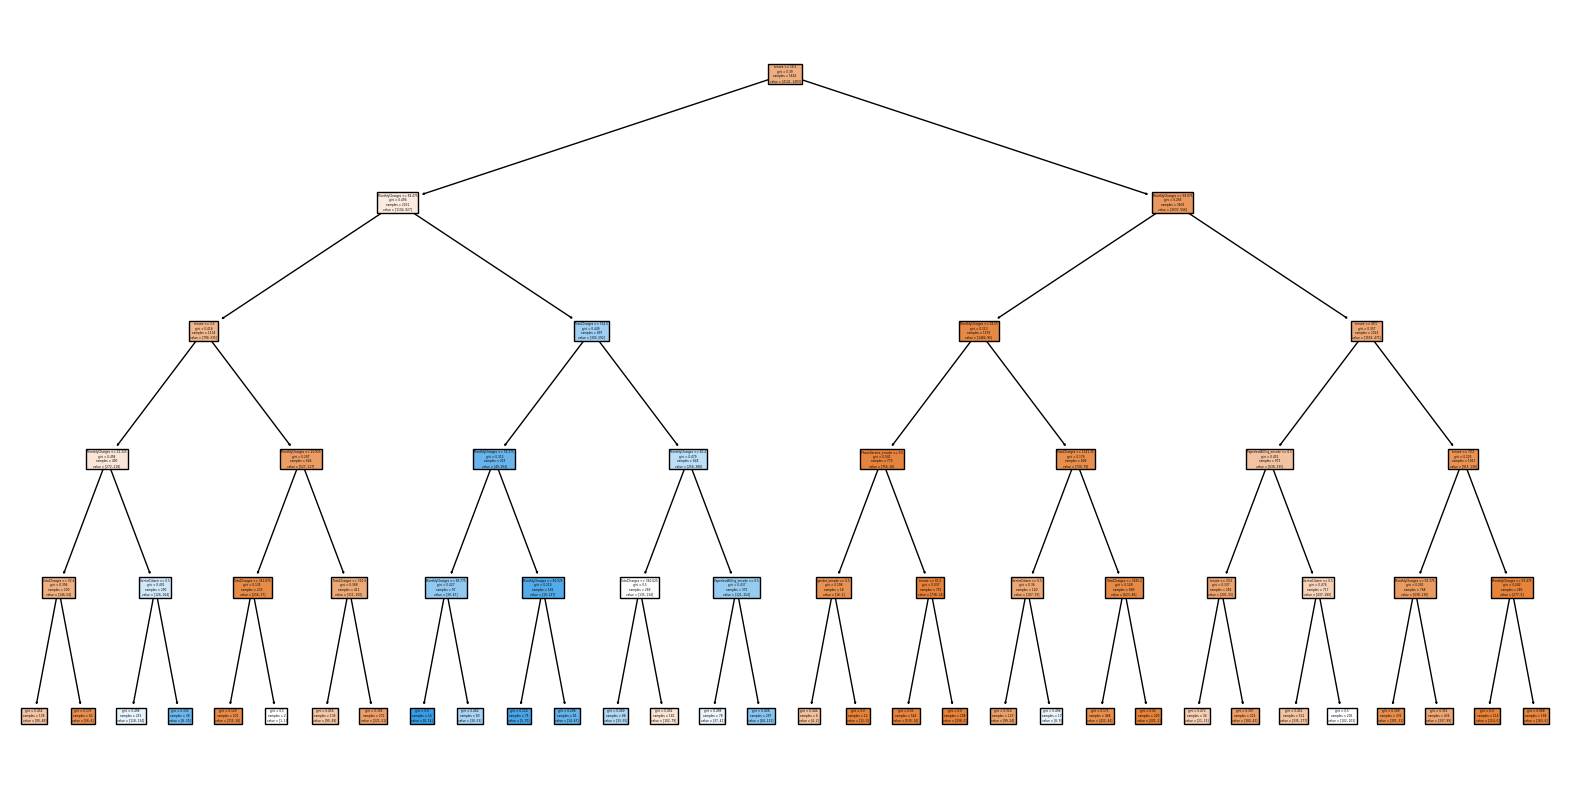

In [175]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_5,
          feature_names=feature_names,
          filled=True)

#### 1-2. max_depth = 8

[Text(0.5030930034129693, 0.9444444444444444, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4141, 1493]'),
 Text(0.2502133105802048, 0.8333333333333334, 'MonthlyCharges <= 69.475\ngini = 0.496\nsamples = 2031\nvalue = [1104, 927]'),
 Text(0.12457337883959044, 0.7222222222222222, 'tenure <= 3.5\ngini = 0.416\nsamples = 1134\nvalue = [799, 335]'),
 Text(0.06399317406143344, 0.6111111111111112, 'MonthlyCharges <= 22.325\ngini = 0.494\nsamples = 490\nvalue = [272, 218]'),
 Text(0.027303754266211604, 0.5, 'TotalCharges <= 33.4\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(0.017064846416382253, 0.3888888888888889, 'SeniorCitizen <= 0.5\ngini = 0.454\nsamples = 138\nvalue = [90, 48]'),
 Text(0.013651877133105802, 0.2777777777777778, 'TotalCharges <= 19.225\ngini = 0.444\nsamples = 135\nvalue = [90, 45]'),
 Text(0.006825938566552901, 0.16666666666666666, 'MonthlyCharges <= 18.925\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.0034129692832764505, 0.0555555555555555

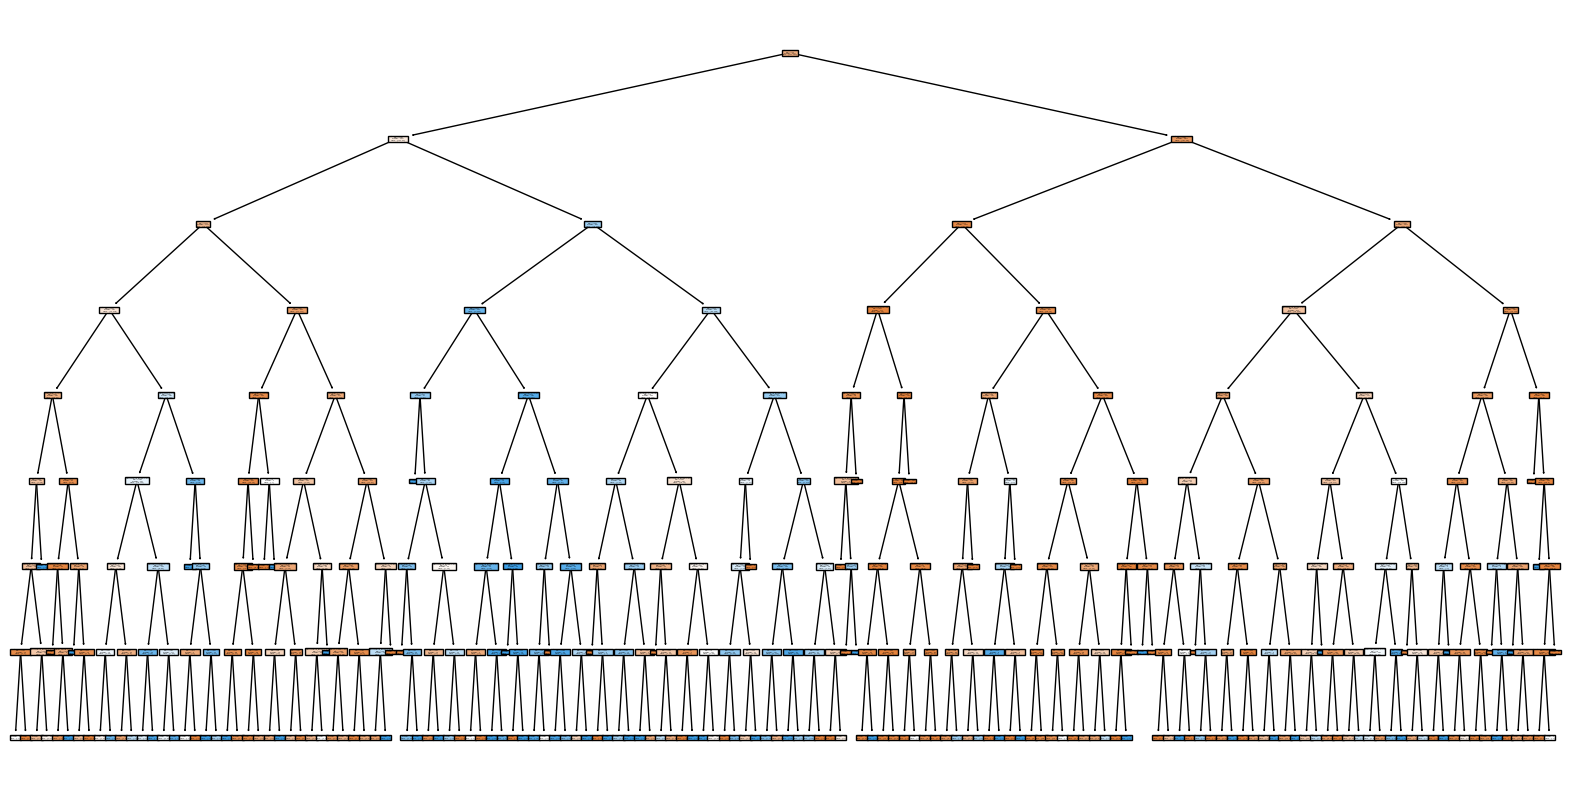

In [176]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_8,
          feature_names=feature_names,
          filled=True)

#### 1-3. max_depth = 12

[Text(0.48661709732423925, 0.9615384615384616, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4141, 1493]'),
 Text(0.24709251486533754, 0.8846153846153846, 'MonthlyCharges <= 69.475\ngini = 0.496\nsamples = 2031\nvalue = [1104, 927]'),
 Text(0.12931750612102133, 0.8076923076923077, 'tenure <= 3.5\ngini = 0.416\nsamples = 1134\nvalue = [799, 335]'),
 Text(0.06526538999650228, 0.7307692307692307, 'MonthlyCharges <= 22.325\ngini = 0.494\nsamples = 490\nvalue = [272, 218]'),
 Text(0.030954879328436515, 0.6538461538461539, 'TotalCharges <= 33.4\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(0.014340678558936691, 0.5769230769230769, 'SeniorCitizen <= 0.5\ngini = 0.454\nsamples = 138\nvalue = [90, 48]'),
 Text(0.012941587967820916, 0.5, 'TotalCharges <= 19.225\ngini = 0.444\nsamples = 135\nvalue = [90, 45]'),
 Text(0.004197271773347324, 0.4230769230769231, 'MonthlyCharges <= 18.925\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.0027981811822315496, 0.346153846153846

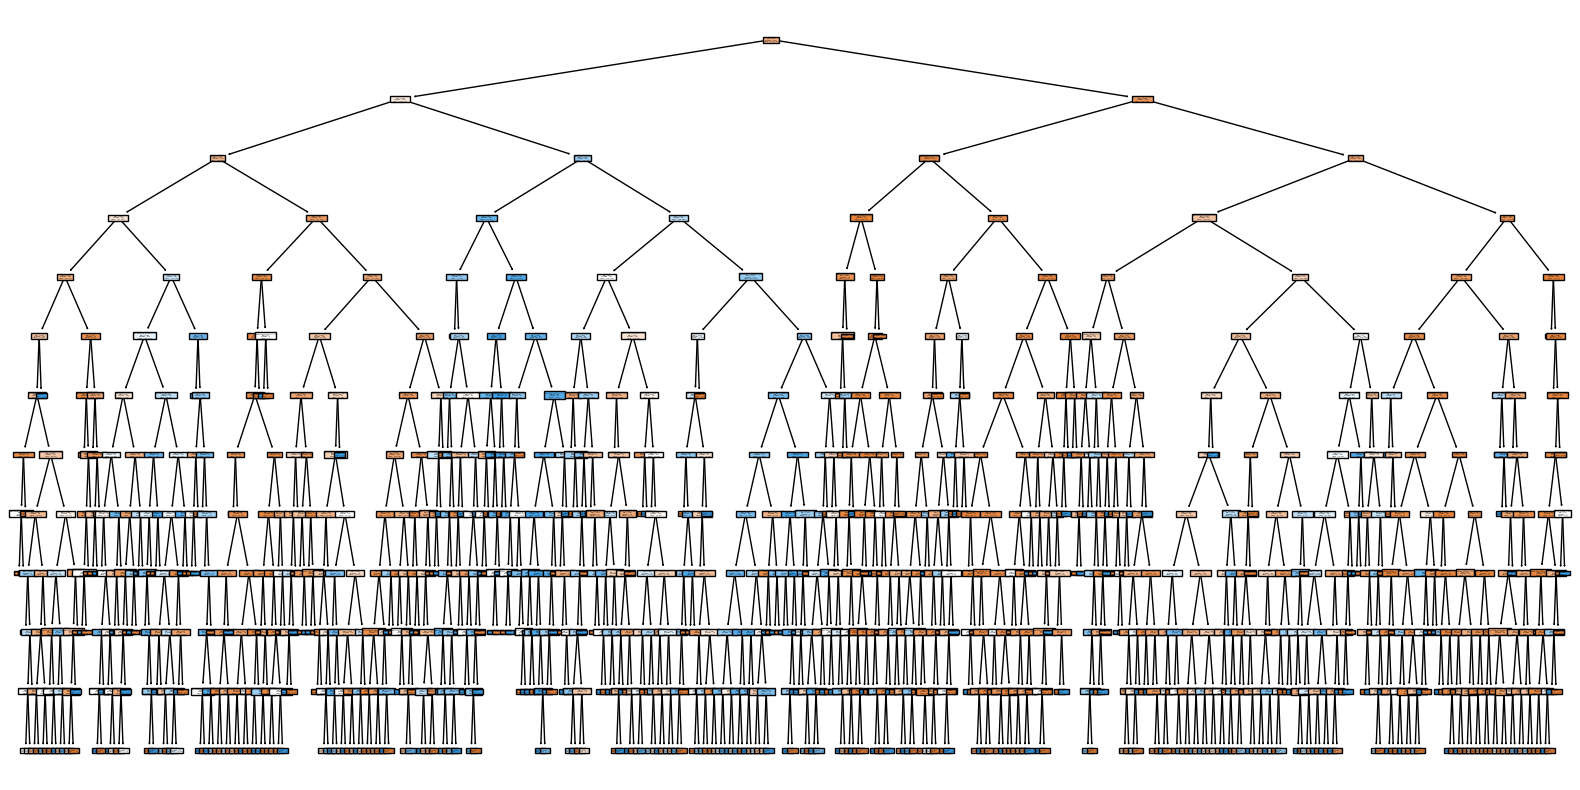

In [177]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_12,
          feature_names=feature_names,
          filled=True)

#### 1-4. max_depth = 15

[Text(0.46969721009341997, 0.96875, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4141, 1493]'),
 Text(0.23287353185079882, 0.90625, 'MonthlyCharges <= 69.475\ngini = 0.496\nsamples = 2031\nvalue = [1104, 927]'),
 Text(0.12653478709721094, 0.84375, 'tenure <= 3.5\ngini = 0.416\nsamples = 1134\nvalue = [799, 335]'),
 Text(0.06614498713782832, 0.78125, 'MonthlyCharges <= 22.325\ngini = 0.494\nsamples = 490\nvalue = [272, 218]'),
 Text(0.03230774438126185, 0.71875, 'TotalCharges <= 33.4\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(0.014791497427565664, 0.65625, 'SeniorCitizen <= 0.5\ngini = 0.454\nsamples = 138\nvalue = [90, 48]'),
 Text(0.013708367181153534, 0.59375, 'TotalCharges <= 19.225\ngini = 0.444\nsamples = 135\nvalue = [90, 45]'),
 Text(0.003249390739236393, 0.53125, 'MonthlyCharges <= 18.925\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.002166260492824262, 0.46875, 'PaperlessBilling_encode <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0

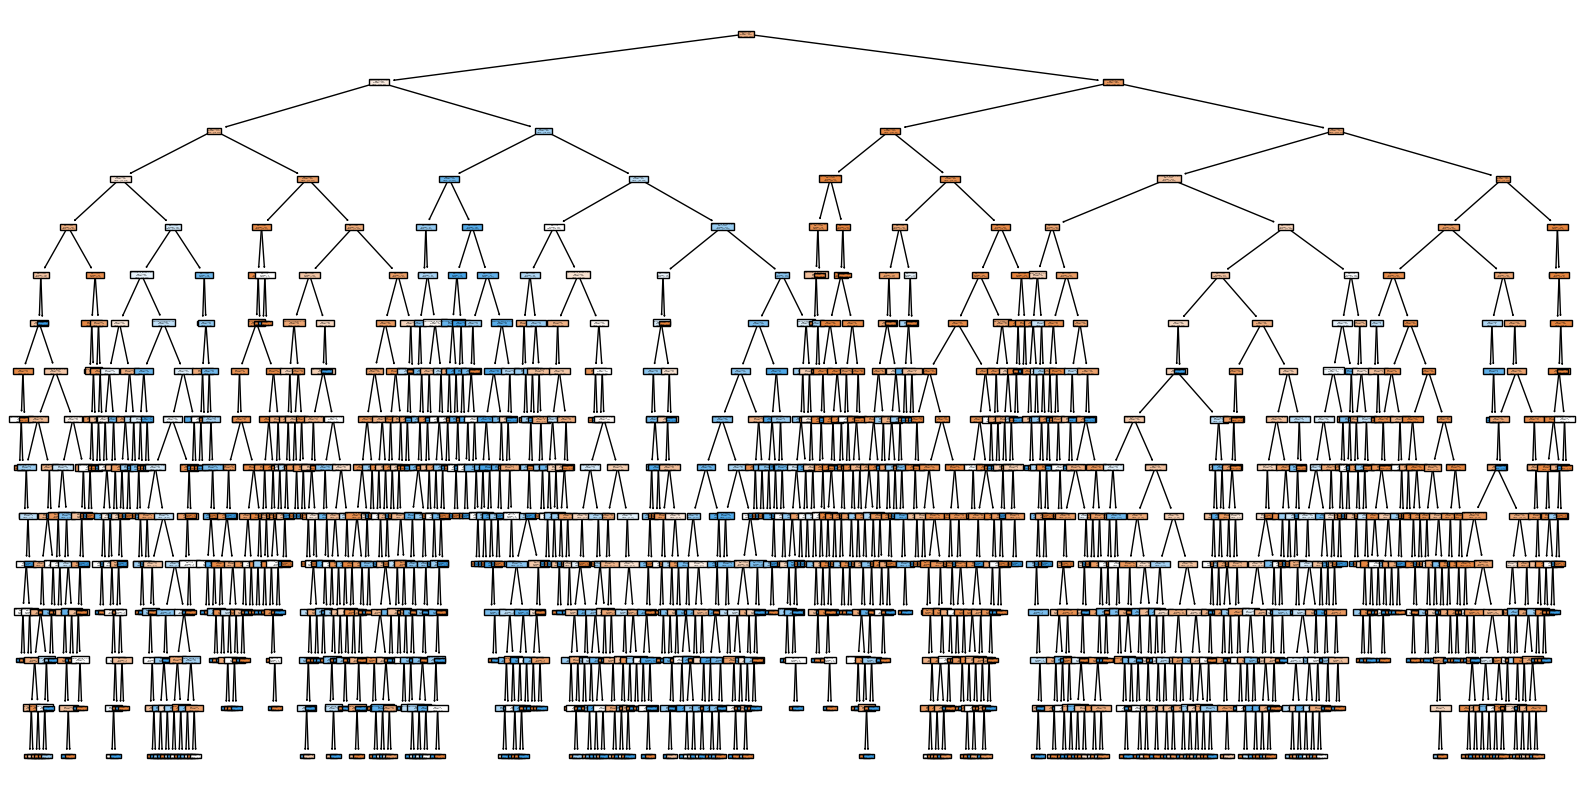

In [178]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_15,
          feature_names=feature_names,
          filled=True)

#### 1-5. max_depth = 18

[Text(0.46146992457962416, 0.9736842105263158, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4141, 1493]'),
 Text(0.22860526397131553, 0.9210526315789473, 'MonthlyCharges <= 69.475\ngini = 0.496\nsamples = 2031\nvalue = [1104, 927]'),
 Text(0.12637163081107813, 0.868421052631579, 'tenure <= 3.5\ngini = 0.416\nsamples = 1134\nvalue = [799, 335]'),
 Text(0.06960363089350478, 0.8157894736842105, 'MonthlyCharges <= 22.325\ngini = 0.494\nsamples = 490\nvalue = [272, 218]'),
 Text(0.03768752060666007, 0.7631578947368421, 'TotalCharges <= 33.4\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(0.019456808440487965, 0.7105263157894737, 'SeniorCitizen <= 0.5\ngini = 0.454\nsamples = 138\nvalue = [90, 48]'),
 Text(0.01840174744477415, 0.6578947368421053, 'TotalCharges <= 19.225\ngini = 0.444\nsamples = 135\nvalue = [90, 45]'),
 Text(0.006989779096604022, 0.6052631578947368, 'MonthlyCharges <= 18.925\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.005934718100890208, 0.5526

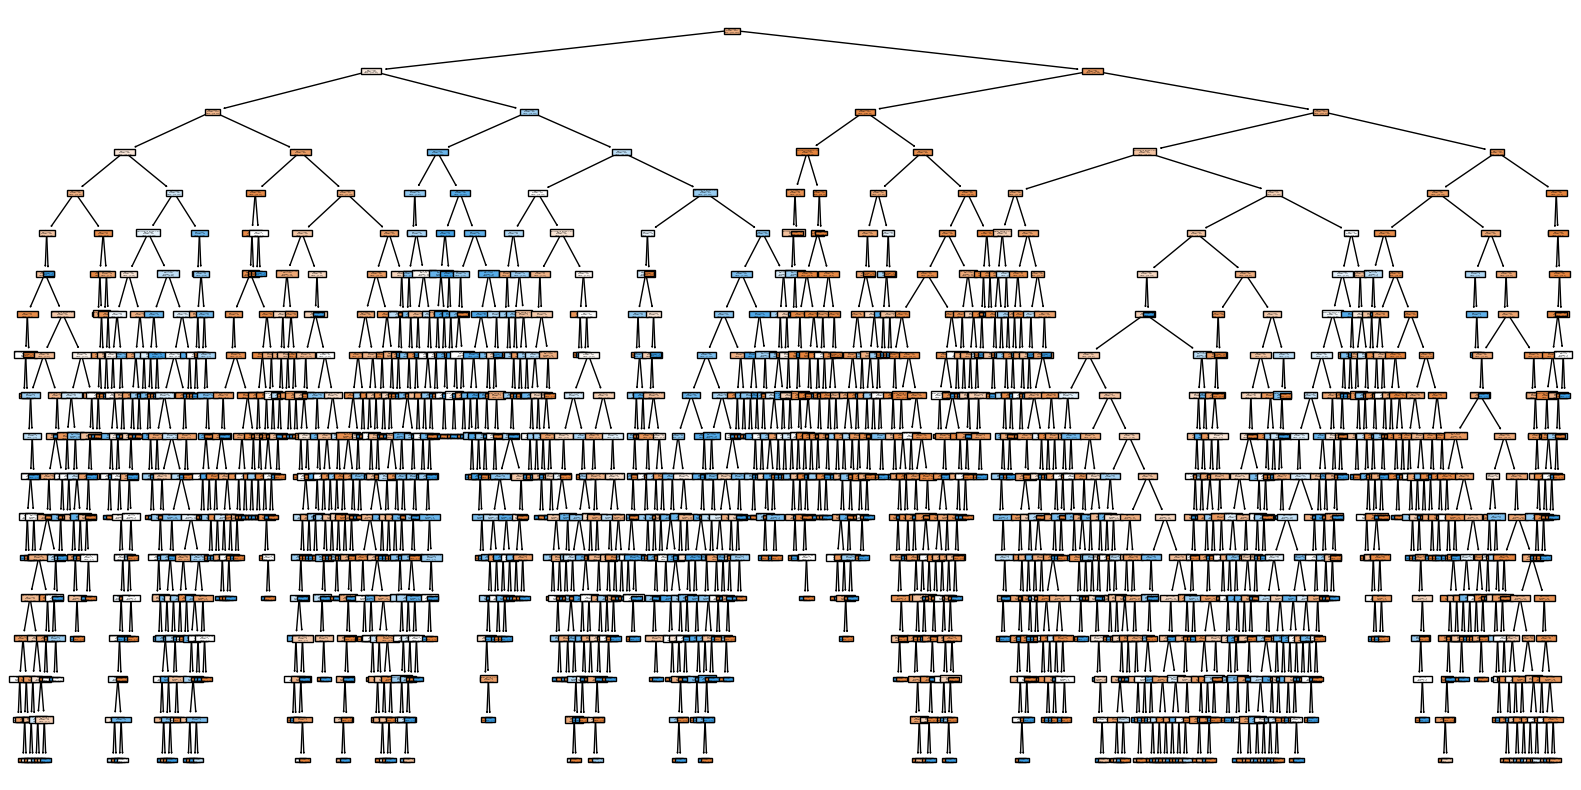

In [179]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_18,
          feature_names=feature_names,
          filled=True)

### 2. 피처 중요도 시각화 하기

#### 2-1. max_depth = 5

array([1.37654226e-03, 2.31009077e-02, 5.10186254e-01, 0.00000000e+00,
       0.00000000e+00, 4.65800181e-04, 2.50501026e-02, 3.79550017e-01,
       6.02703760e-02])

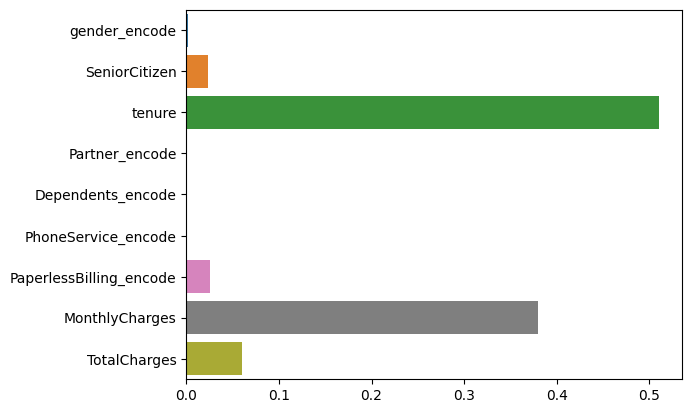

In [180]:
sns.barplot(x=model_5.feature_importances_, y=feature_names)

model_5.feature_importances_

#### 2-2. max_depth = 8

array([1.37654226e-03, 2.31009077e-02, 5.10186254e-01, 0.00000000e+00,
       0.00000000e+00, 4.65800181e-04, 2.50501026e-02, 3.79550017e-01,
       6.02703760e-02])

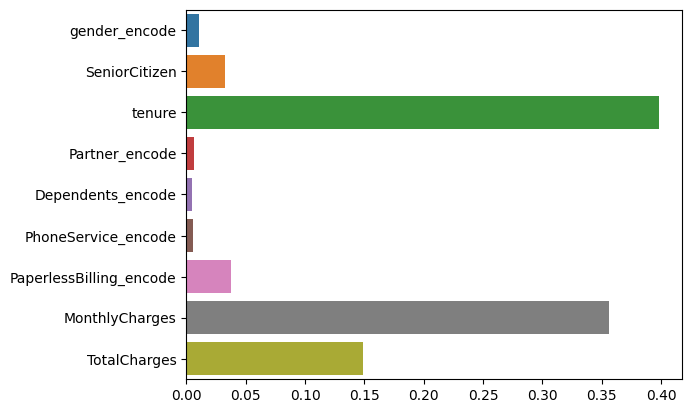

In [181]:
sns.barplot(x=model_8.feature_importances_, y=feature_names)

model_5.feature_importances_

#### 2-3. max_depth = 12

array([1.37654226e-03, 2.31009077e-02, 5.10186254e-01, 0.00000000e+00,
       0.00000000e+00, 4.65800181e-04, 2.50501026e-02, 3.79550017e-01,
       6.02703760e-02])

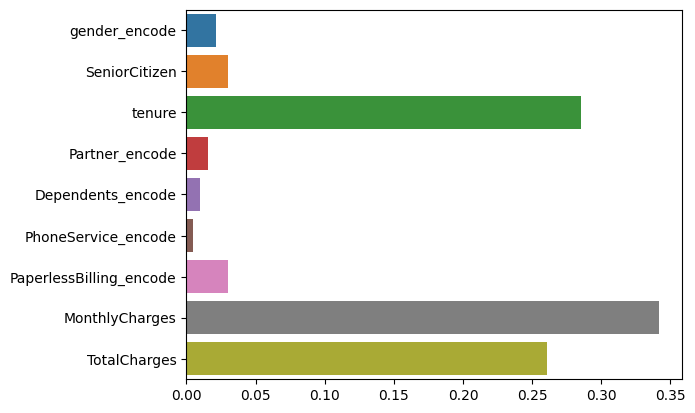

In [182]:
sns.barplot(x=model_12.feature_importances_, y=feature_names)

model_5.feature_importances_

#### 2-4. max_depth = 15

array([1.37654226e-03, 2.31009077e-02, 5.10186254e-01, 0.00000000e+00,
       0.00000000e+00, 4.65800181e-04, 2.50501026e-02, 3.79550017e-01,
       6.02703760e-02])

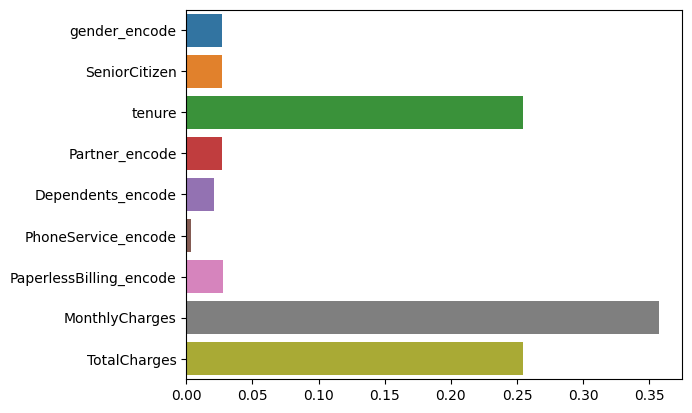

In [183]:
sns.barplot(x=model_15.feature_importances_, y=feature_names)

model_5.feature_importances_

#### 2-5. max_depth = 18

array([1.37654226e-03, 2.31009077e-02, 5.10186254e-01, 0.00000000e+00,
       0.00000000e+00, 4.65800181e-04, 2.50501026e-02, 3.79550017e-01,
       6.02703760e-02])

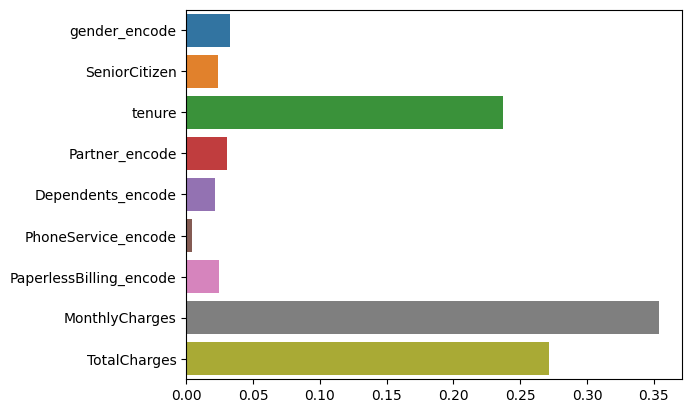

In [184]:
sns.barplot(x=model_18.feature_importances_, y=feature_names)

model_5.feature_importances_

### 3. 정확도(Accuracy)구하기

#### 3.1 max_depth = 5

In [185]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_5)

0.772888573456352

#### 3.2 max_depth = 8

In [186]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_8)

0.7814052519517388

#### 3.3 max_depth = 12

In [187]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_12)

0.7459190915542938

#### 3.4 max_depth = 15

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_15)

0.7331440738112136

#### 3.5 max_depth = 18

In [189]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_18)

0.7203690560681334